## <font color='darkblue'>Preface</font>
([article source](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)) <font size='3ptx'><b>When building a machine learning model in real-life, it’s almost rare that all the variables in the dataset are useful to build a model. Adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a classifier.</b></font>

Furthermore adding more and more variables to a model increases the overall complexity of the model. As per the Law of Parsimony of ‘[Occam’s Razor](https://en.wikipedia.org/wiki/Occam%27s_razor)’, **the best explanation to a problem is that which involves the fewest possible assumptions. Thus, <font color='darkblue'>feature selection</font> becomes an indispensable part of building machine learning models.**

<a id='sect0'></a>
### <font color='darkgreen'>Goal</font>
<font size='3ptx'><b>The goal of feature selection in machine learning is to find the best set of features that allows one to build useful models of studied phenomena.</b></font>

The techniques for feature selection in machine learning can be broadly classified into the following categories:
* **Supervised Techniques**: These techniques can be used for labeled data, and are used to identify the relevant features for increasing the efficiency of supervised models like classification and regression.
* **Unsupervised Techniques**: These techniques can be used for unlabeled data.

From a taxonomic point of view, these techniques are classified as under:
1. <font size='3ptx'><b><a href='#sect1'>Filter methods</a></b></font>
2. <font size='3ptx'><b><a href='#sect2'>Wrapper methods</a></b></font>
3. <font size='3ptx'><b><a href='#sect3'>Embedded methods</a></b></font>

In this article, we will discuss some popular techniques of feature selection in machine learning.

In [1]:
#!pip install skfeature
#!pip install mlxtend

In [49]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### <font color='darkgreen'>Dataset</font>

In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector, ExhaustiveFeatureSelector
from sklearn.datasets import load_iris, load_diabetes, load_breast_cancer
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from construct_W import construct_W
import pandas as pd
import numpy as np 
from scipy.sparse import *
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
iris_data = load_iris()
X, y = iris_data.data, iris_data.target

In [4]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
diab_data = load_diabetes()
X_diab, y_diab = diab_data.data, diab_data.target

In [6]:
diab_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
bc_data = load_breast_cancer()
X_bc, y_bc = bc_data.data, bc_data.target

In [8]:
bc_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<a id='sect1'></a>
## <font color='darkblue'>Filter methods</font>
* <font size='3ptx'><b><a href='#sect1_1'>Information Gain</a></b></font>
* <font size='3ptx'><b><a href='#sect1_2'>Chi-square Test</a></b></font>
* <font size='3ptx'><b><a href='#sect1_3'>Fisher’s Score</a></b></font>
* <font size='3ptx'><b><a href='#sect1_4'>Correlation Coefficient</a></b></font>
* <font size='3ptx'><b><a href='#sect1_5'>Variance Threshold</a></b></font>
* <font size='3ptx'><b><a href='#sect1_6'>Mean Absolute Difference (MAD)</a></b></font>
<br/>

<font size='3ptx'><b>Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. </b></font>

<font color='darkgreen'><b>These methods are faster and less computationally expensive than wrapper methods</b></font>. When dealing with high-dimensional data, it is computationally cheaper to use filter methods. Let’s, discuss some of these techniques:

<a id='sect1_1'></a>
### <font color='darkgreen'>Information Gain</font>
<b>Information gain calculates the reduction in entropy from the transformation of a dataset</b>. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [9]:
importances = mutual_info_classif(X, y)
importances

array([0.50717134, 0.2136381 , 0.9988554 , 0.98429578])

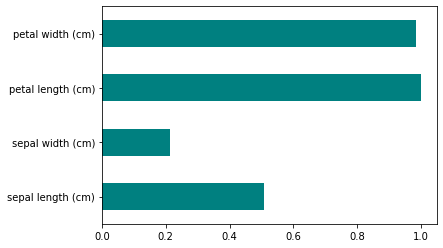

In [10]:
feat_importances = pd.Series(importances, iris_data.feature_names)
feat_importances.plot(kind='barh', color='teal')
plt.show()

<a id='sect1_2'></a>
### <font color='darkgreen'>Chi-square Test</font>
**The [Chi-square test](https://en.wikipedia.org/wiki/Chi-squared_test) is used for categorical features in a dataset**.

We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, <b><font color='orange'>the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5</font></b>.

In [11]:
# Check sklearn.feature_selection.chi2 for details
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(f'Original dataset shape={X.shape}')
print(f'New dataset shape={X_new.shape}')

Original dataset shape=(150, 4)
New dataset shape=(150, 2)


<a id='sect1_3'></a>
### <font color='darkgreen'>Fisher’s Score</font>
**[Fisher score](https://github.com/jundongl/scikit-feature/blob/master/skfeature/function/similarity_based/fisher_score.py) is one of the most widely used supervised feature selection methods.**

The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case. We just port the fisher score here for quick reference. You can refer to [`scikit-feature`](https://github.com/jundongl/scikit-feature) for more information:

In [12]:
def fisher_score(X, y):
    """
    This function implements the fisher score feature selection, steps are as follows:
    1. Construct the affinity matrix W in fisher score way
    2. For the r-th feature, we define fr = X(:,r), D = diag(W*ones), ones = [1,...,1]', L = D - W
    3. Let fr_hat = fr - (fr'*D*ones)*ones/(ones'*D*ones)
    4. Fisher score for the r-th feature is score = (fr_hat'*D*fr_hat)/(fr_hat'*L*fr_hat)-1
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    Output
    ------
    score: {numpy array}, shape (n_features,)
        fisher score for each feature
    Reference
    ---------
    He, Xiaofei et al. "Laplacian Score for Feature Selection." NIPS 2005.
    Duda, Richard et al. "Pattern classification." John Wiley & Sons, 2012.
    """

    # Construct weight matrix W in a fisherScore way
    kwargs = {"neighbor_mode": "supervised", "fisher_score": True, 'y': y}
    W = construct_W(X, **kwargs)

    # build the diagonal D matrix from affinity matrix W
    D = np.array(W.sum(axis=1))
    L = W
    tmp = np.dot(np.transpose(D), X)
    D = diags(np.transpose(D), [0])
    Xt = np.transpose(X)
    t1 = np.transpose(np.dot(Xt, D.todense()))
    t2 = np.transpose(np.dot(Xt, L.todense()))
    # compute the numerator of Lr
    D_prime = np.sum(np.multiply(t1, X), 0) - np.multiply(tmp, tmp)/D.sum()
    # compute the denominator of Lr
    L_prime = np.sum(np.multiply(t2, X), 0) - np.multiply(tmp, tmp)/D.sum()
    # avoid the denominator of Lr to be 0
    D_prime[D_prime < 1e-12] = 10000
    lap_score = 1 - np.array(np.multiply(L_prime, 1/D_prime))[0, :]

    # compute fisher score from laplacian score, where fisher_score = 1/lap_score - 1
    score = 1.0/lap_score - 1
    return np.transpose(score)

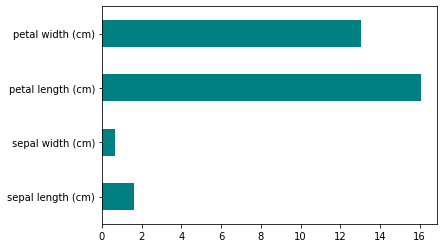

In [13]:
ranks = fisher_score(X, y)

# Plotting the ranks
feat_importances = pd.Series(ranks, iris_data.feature_names)
feat_importances.plot(kind='barh', color='teal')
plt.show()

<a id='sect1_4'></a>
### <font color='darkgreen'>Correlation Coefficient</font>
**Correlation is a measure of the linear relationship of 2 or more variables.**

Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the [**Pearson Correlation**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) here.

<AxesSubplot:>

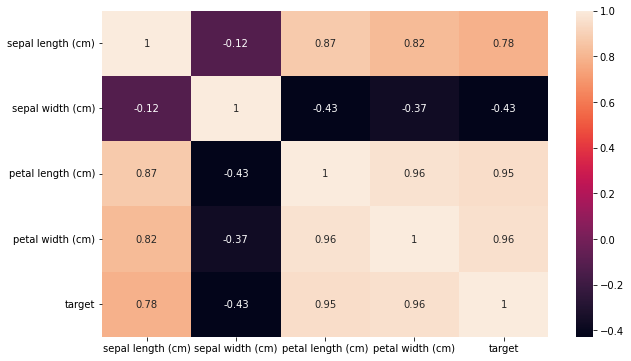

In [14]:
iris_df = pd.DataFrame(X, columns=iris_data.feature_names)
iris_df['target'] = y
corr = iris_df.corr()

# Plotting Heatmap. Check Pearson correlation between `target` and other column(s)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)

We need to set an absolute value, say 0.5 as the threshold for selecting the variables. <b>If we find that the predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable</b>. We can also compute multiple correlation coefficients to check whether more than two variables are correlated to each other. This phenomenon is known as [**multicollinearity**](https://en.wikipedia.org/wiki/Multicollinearity).

<a id='sect1_5'></a>
### <font color='darkgreen'>Variance Threshold</font>
**The variance threshold is a simple baseline approach to feature selection.**

It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. <font color='darkred'><b>We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods</b></font>.

In [15]:
iris_df = pd.DataFrame(X, columns=iris_data.feature_names)
iris_df['zero_variance'] = [0] * iris_df.shape[0]

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(iris_df.to_numpy())

# The last one has zero variance and therefore it will
# be False.
v_threshold.get_support()

array([ True,  True,  True,  True, False])

The <font color='blue'>get_support</font> returns a Boolean vector where True means that the variable does not have zero variance.

<a id='sect1_6'></a>
### <font color='darkgreen'>Mean Absolute Difference (MAD)</font>
**The mean absolute difference (MAD) computes the absolute difference from the mean value.** 

The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scale variant. This means that higher the MAD, higher the discriminatory power.

In [16]:
diab_df = pd.DataFrame(X_diab, columns=diab_data.feature_names)
diab_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [17]:
mean_abs_diff = np.sum(np.abs(X_diab-np.mean(X_diab, axis=0)), axis=0) / X_diab.shape[0]

mean_abs_diff

array([0.0392948 , 0.04746961, 0.03835843, 0.0392822 , 0.03736655,
       0.03748822, 0.03751766, 0.03710344, 0.03873332, 0.03704057])

<BarContainer object of 10 artists>

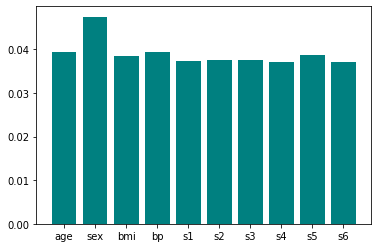

In [18]:
# Plot the barchart
plt.bar(np.arange(X_diab.shape[1]), mean_abs_diff, color='teal', tick_label=diab_data.feature_names)

<a id='sect2'></a>
## <font color='darkblue'>Wrapper Methods</font>
* <font size='3ptx'><b><a href='#sect2_1'>Forward Feature Selection</a></b></font>
* <font size='3ptx'><b><a href='#sect2_2'>Backward Feature Elimination</a></b></font>
* <font size='3ptx'><b><a href='#sect2_3'>Exhaustive Feature Selection</a></b></font>
* <font size='3ptx'><b><a href='#sect2_4'>Recursive Feature Eliminaiton</a></b></font>
<br/>

<font size='3ptx'><b>Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. </b></font>

The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. <b>It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion</b>. <font color='darkgreen'><b>The wrapper methods usually result in better predictive accuracy than filter methods.</b></font>

<a id='sect2_1'></a>
### <font color='darkgreen'>Forward Feature Selection</font>
This is an iterative method wherein we start with the best performing variable against the target. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.

In [19]:
diab_df = pd.DataFrame(X_diab, columns=diab_data.feature_names)

lr = LogisticRegression()
ffs = SequentialFeatureSelector(lr, k_features='best', forward=True, n_jobs=-1)
ffs.fit(X_diab, y_diab)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features='best',
                          n_jobs=-1)

In [20]:
lr.fit(X_diab, y_diab)
y_pred = lr.predict(X_diab)
print(f"Original MSE: {mean_absolute_error(y_diab, y_pred):.02f}")

Original MSE: 54.74


In [21]:
features = list(ffs.k_feature_names_)
features = list(map(int, features))
features

[8]

In [22]:
X_diag_new = diab_df.iloc[:, features].to_numpy()
X_diag_new.shape

(442, 1)

In [23]:
lr.fit(X_diag_new, y_diab)
y_pred = lr.predict(X_diag_new)
print(f'After feature selection: {mean_absolute_error(y_diab, y_pred):.02f}')

After feature selection: 55.31


<a id='sect2_2'></a>
### <font color='darkgreen'>Backward Feature Elimination</font> ([back](#sect2))
This method works exactly opposite to the Forward Feature Selection method. Here, we start with all the features available and build a model. Next, we the variable from the model which gives the best evaluation measure value. This process is continued until the preset criterion is achieved.

In [24]:
lr = LogisticRegressionCV(random_state=42, max_iter=500)
lr.fit(X, y)

LogisticRegressionCV(max_iter=500, random_state=42)

In [25]:
y_pred = lr.predict(X)
acc_pert = 100 * accuracy_score(y, y_pred)
print(f'Base accuracy: {acc_pert:.02f}')

Base accuracy: 98.00


In [26]:
%%time
# Select 50% of features
bfs = SequentialFeatureSelector(
    lr, k_features=int(X.shape[1]*0.5), forward=False, n_jobs=-1)
bfs.fit(X, y)

CPU times: user 6.28 s, sys: 4.47 ms, total: 6.28 s
Wall time: 15.6 s


SequentialFeatureSelector(estimator=LogisticRegressionCV(max_iter=500,
                                                         random_state=42),
                          forward=False, k_features=2, n_jobs=-1)

In [27]:
features = list(bfs.k_feature_names_)
features = list(map(int, features))
features

[2, 3]

In [28]:
X_df = pd.DataFrame(X, columns=iris_data.feature_names)
X_new = X_df.iloc[:, features].to_numpy()
X_new.shape

(150, 2)

In [29]:
lr.fit(X_new, y)

LogisticRegressionCV(max_iter=500, random_state=42)

In [30]:
y_pred = lr.predict(X_new)
acc_pert = 100 * accuracy_score(y, y_pred)
print(f'Base accuracy: {acc_pert:.02f}')

Base accuracy: 96.67


This method along with the one discussed above is also known as the Sequential Feature Selection method.

<a id='sect2_3'></a>
### <font color='darkgreen'>Exhaustive Feature Selection</font> ([back](#sect2))
**This is the most robust feature selection method covered so far.** This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

In [31]:
efs = ExhaustiveFeatureSelector(
    RandomForestClassifier(),
    min_features=1,
    max_features=4,
    cv=2)

efs = efs.fit(X, y)

Features: 15/15

In [32]:
X_df = pd.DataFrame(X, columns=iris_data.feature_names)
selected_features = X_df.iloc[:, list(map(lambda e: e-1, efs.best_idx_))]
selected_features.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm)
5,5.4,3.9,1.7
94,5.6,2.7,4.2
23,5.1,3.3,1.7
118,7.7,2.6,6.9
11,4.8,3.4,1.6


In [33]:
acc_after_fs = efs.best_score_ * 100
print(f'Accuracy after feature selection: {acc_after_fs:.02f}')

Accuracy after feature selection: 96.67


<a id='sect2_4'></a>
### <font color='darkgreen'>Recursive Feature Eliminaiton</font> ([back](#sect2))
Given an external estimator that assigns weights to features (<font color='brown'>e.g., the coefficients of a linear model</font>), **the goal of recursive feature elimination** (<font color='brown'>RFE</font>) **is to select features by recursively considering smaller and smaller sets of features**. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a <font color='violet'>coef_</font> attribute or through a <font color='violet'>feature_importances_</font> attribute.

In [34]:
lr = LogisticRegressionCV(random_state=42, max_iter=500)
lr.fit(X_bc, y_bc)
y_pred = lr.predict(X_bc)
acc_pert = 100 * accuracy_score(y_bc, y_pred)
print(f'Base accuracy: {acc_pert:.02f}')

Base accuracy: 97.72


In [35]:
%%time
lr = LogisticRegressionCV(random_state=42, max_iter=500)
rfe = RFE(lr, n_features_to_select = int(X_bc.shape[1]*0.8))
rfe.fit(X_bc, y_bc)

CPU times: user 1min 5s, sys: 1min 25s, total: 2min 31s
Wall time: 37.9 s


RFE(estimator=LogisticRegressionCV(max_iter=500, random_state=42),
    n_features_to_select=24)

In [36]:
y_pred = rfe.predict(X_bc)

In [37]:
acc_pert = 100 * accuracy_score(y_bc, y_pred)
print(f'Accuracy: {acc_pert:.02f}')

Accuracy: 98.42


<a id='sect3'></a>
## <font color='darkblue'>Embedded Methods</font> ([back](#sect0))
* <font size='3ptx'><b><a href='#sect3_1'>LASSO Regularization (L1)</a></b></font>
* <font size='3ptx'><b><a href='#sect3_2'>Random Forest Importance</a></b></font>
<br/>

<font size='3ptx'><b>These methods encompass the benefits of both the [wrapper](#sect2) and [filter](#sect1) methods, by including interactions of features but also maintaining reasonable computational cost.</b></font>

 Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.

<a id='sect3_1'></a>
### <font color='darkgreen'>LASSO Regularization (L1)</font>
Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularization, **Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model**.

In [38]:
X_bc.shape

(569, 30)

In [39]:
lr = LogisticRegressionCV(
    random_state=42, solver='liblinear', penalty='l1', max_iter=500)
model = SelectFromModel(lr)
model.fit(X_bc, y_bc)
X_bc_new = model.transform(X_bc)

In [40]:
# Total 25 out of 30 columns being selected!
X_bc_new.shape

(569, 25)

In [41]:
# True means the corresponding column is selected; False otherwise.
model.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [42]:
model.threshold_

1e-05

In [43]:
model.estimator_.coef_

array([[ 1.69681398e+00, -1.67692299e-01,  1.69212099e-01,
        -7.55868931e-03,  0.00000000e+00,  5.09273368e+01,
        -1.42573724e+01, -1.29373942e+02,  1.54683278e+01,
         0.00000000e+00, -5.69198196e+00,  1.55202655e+00,
         1.00002055e+00, -2.11620749e-01,  0.00000000e+00,
         3.67269084e+01,  3.82809435e+01, -7.83787326e+01,
         3.81728956e+01,  0.00000000e+00,  1.70812486e-02,
        -3.83667153e-01, -1.18741338e-01, -1.74719097e-02,
        -3.98409529e+01,  2.78947052e+00, -1.05064513e+01,
        -3.26226043e+01, -2.29130873e+01,  0.00000000e+00]])

<a id='sect3_2'></a>
### <font color='darkgreen'>Random Forest Importance</font>
<font size='3ptx'><b>Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees.</b></font>

The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (<font color='brown'>Gini impurity</font>) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [44]:
model = RandomForestClassifier(n_estimators=300)
model.fit(X_bc, y_bc)

RandomForestClassifier(n_estimators=300)

In [45]:
importances = model.feature_importances_
final_df = pd.DataFrame({"Features": bc_data.feature_names, "Importances": importances})
final_df.set_index('Importances')
final_df = final_df.sort_values('Importances', ascending=False)
final_df[:10]

,Features,Importances
22,worst perimeter,0.130174
20,worst radius,0.125362
27,worst concave points,0.112271
23,worst area,0.108796
7,mean concave points,0.106502
0,mean radius,0.051562
6,mean concavity,0.050041
2,mean perimeter,0.047810
13,area error,0.036954
26,worst concavity,0.034880


In [46]:
list(final_df.Features.values)

['worst perimeter',
 'worst radius',
 'worst concave points',
 'worst area',
 'mean concave points',
 'mean radius',
 'mean concavity',
 'mean perimeter',
 'area error',
 'worst concavity',
 'mean area',
 'worst texture',
 'perimeter error',
 'radius error',
 'worst compactness',
 'mean texture',
 'worst smoothness',
 'worst symmetry',
 'mean compactness',
 'concavity error',
 'mean smoothness',
 'worst fractal dimension',
 'fractal dimension error',
 'texture error',
 'concave points error',
 'symmetry error',
 'compactness error',
 'mean symmetry',
 'smoothness error',
 'mean fractal dimension']

In [47]:
final_df.shape[0]

30

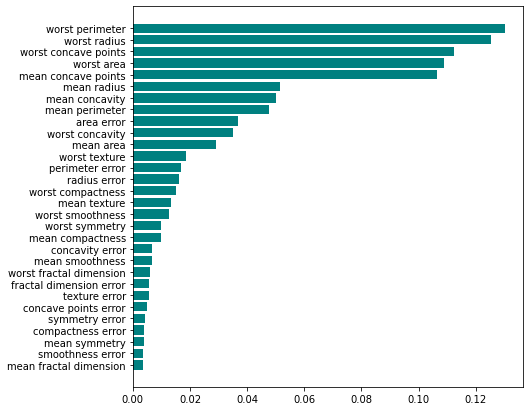

/root/Github/ml_courses/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/root/Github/ml_courses/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/root/Github/ml_courses/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/root/Github/ml_courses/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/root/Github/ml_courses/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less

In [50]:
final_df = final_df.sort_values('Importances', ascending=True)
plt.rcParams['figure.figsize'] = [7, 7]
plt.barh(
    np.arange(final_df.shape[0]),
    final_df.Importances,
    color='teal', 
    tick_label=list(final_df.Features.values))
plt.show()

## <font color='darkblue'>Conclusion</font> ([back](#sect0))
We have discussed a few techniques for feature selection. We have on purpose left the feature extraction techniques like [**Principal Component Analysis**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), Singular Value Decomposition, Linear Discriminant Analysis, etc. These methods help to reduce the dimensionality of the data or reduce the number of variables while preserving the variance of the data.

Apart from the methods discussed above, there are many other methods of feature selection. There are hybrid methods too that use both filtering and wrapping techniques. If you wish to explore more about feature selection techniques, great comprehensive reading material in my opinion would be ‘Feature Selection for Data and Pattern Recognition’ by Urszula Stańczyk and Lakhmi C. Jain.

## <font color='darkblue'>Supplement</font>
* [scikit-feature: scikit-feature is an open-source feature selection repository in Python developed by Data Mining and Machine Learning Lab at Arizona State University](https://github.com/jundongl/scikit-feature)